In [1]:
# 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

'''데이터 준비 관련 라이브러리'''
from sklearn import preprocessing as pp

%matplotlib inline

In [2]:
X = pd.read_csv('../data/total_count.csv')

In [4]:
del X['번호판']
X

,날짜,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지
0,20221201,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,0,0,0,0
1,20221201,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,0,0,0,0
2,20221201,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,0,0,0,0
3,20221201,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,0,0,0,0
4,20221201,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,0,0,0,0
5948208,20221231,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,0,0,0,0
5948209,20221231,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,0,0,0,0
5948210,20221231,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,0,0,0,0


In [5]:
from sklearn.decomposition import PCA

n_components = 16
whiten = False
random_state = 42

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [6]:
X_train_PCA = pca.fit_transform(X)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X.index)

In [7]:
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.544563e+09,1.590635e+06,-664.317313,-178.282741,-87.673488,4.950302,0.290295,0.320991,-0.231483,-0.662730,0.009456,-0.000620,-0.000494,-0.001781,0.029692,0.012676
1,1.544563e+09,1.590635e+06,-469.393512,-177.521680,-89.070520,-0.228311,2.042055,-0.490412,-0.232219,-0.584874,0.006765,0.000106,-0.000312,-0.001164,0.030196,0.012572
2,1.544563e+09,1.590635e+06,-80.546495,-176.004958,-91.857083,-10.639811,3.221789,-1.177465,-0.231712,-0.415609,0.000326,0.001394,-0.000220,0.000214,0.031429,0.012314
3,1.544563e+09,1.590635e+06,-219.492604,-176.548271,-90.861058,-6.990494,0.733802,0.018965,-0.230113,-0.463247,0.001661,0.000787,-0.000498,-0.000139,0.031196,0.012352
4,1.544563e+09,1.590635e+06,-396.422395,-177.237791,-89.593259,-2.216616,1.176647,0.171811,-0.231146,-0.545406,0.005028,0.000262,-0.000433,-0.000811,0.030550,0.012479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,-1.471399e+09,-1.533387e+06,-523.755102,-107.298145,86.060974,-0.125363,1.018228,-0.422972,-0.055031,-0.665116,0.002723,-0.000724,-0.001646,-0.000820,0.039504,-0.008263
5948208,-1.471399e+09,-1.533387e+06,-795.647624,-108.358173,88.009317,7.185261,1.012118,-0.067399,-0.056056,-0.787740,0.007590,-0.001573,-0.001622,-0.001821,0.038571,-0.008075
5948209,-1.471399e+09,-1.533387e+06,-854.624973,-108.588274,88.431933,8.751961,0.644142,-0.479776,-0.056055,-0.814204,0.008522,-0.001765,-0.001638,-0.002060,0.038376,-0.008013
5948210,-1.471400e+09,-1.533387e+06,-854.625043,-108.588256,88.431923,8.751440,0.655830,-0.579088,-0.056079,-0.814583,0.008535,-0.001761,-0.001634,-0.002067,0.038370,-0.008009


In [8]:
sum(pca.explained_variance_ratio_)

0.9999999999999997

In [9]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [10]:
df = pd.read_csv('../data/total_count.csv')

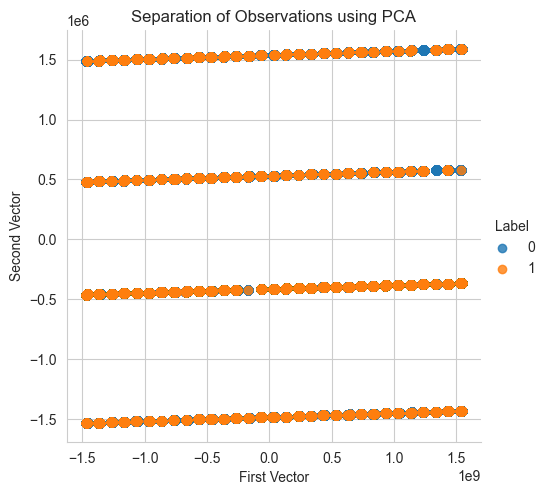

In [11]:
y = df['급가속']
scatterPlot(X_train_PCA, y, 'PCA')

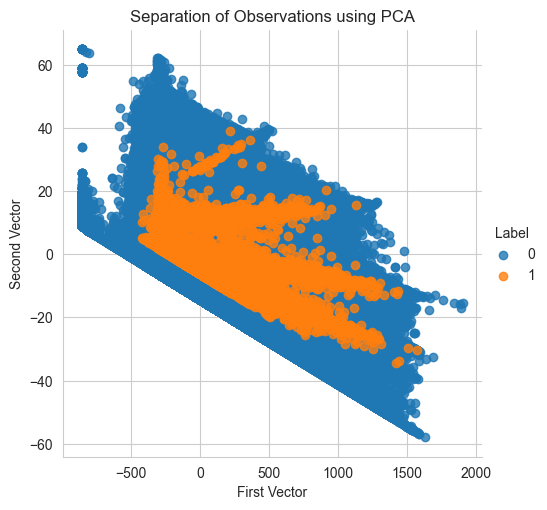

In [11]:
y = df['급출발']
scatterPlot(X_train_PCA, y, 'PCA')

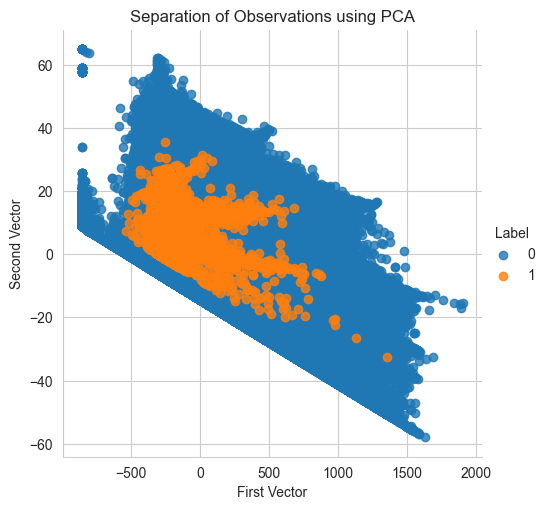

In [12]:
y = df['급감속']
scatterPlot(X_train_PCA, y, 'PCA')

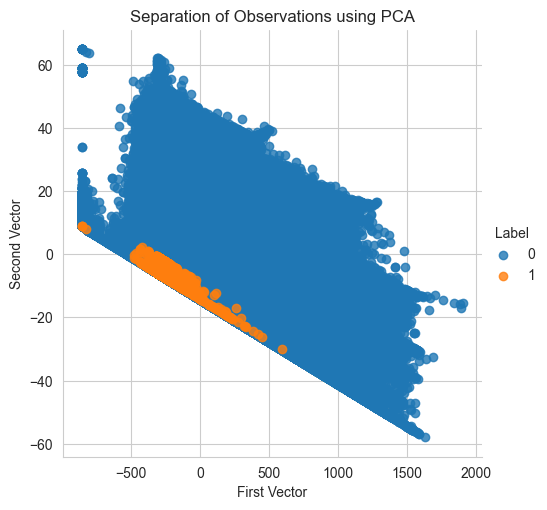

In [13]:
y = df['급정지']
scatterPlot(X_train_PCA, y, 'PCA')

In [14]:
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [15]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [16]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [17]:
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X.index)

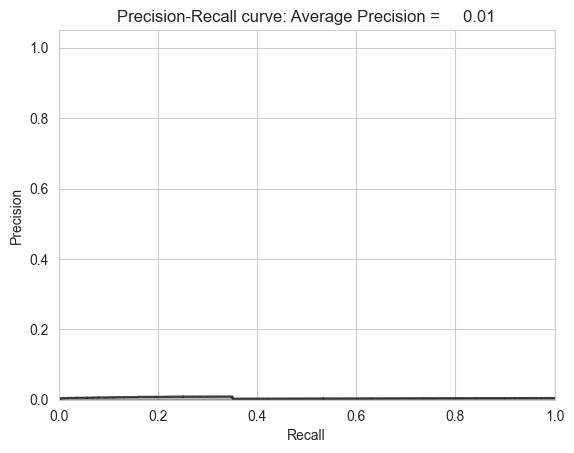

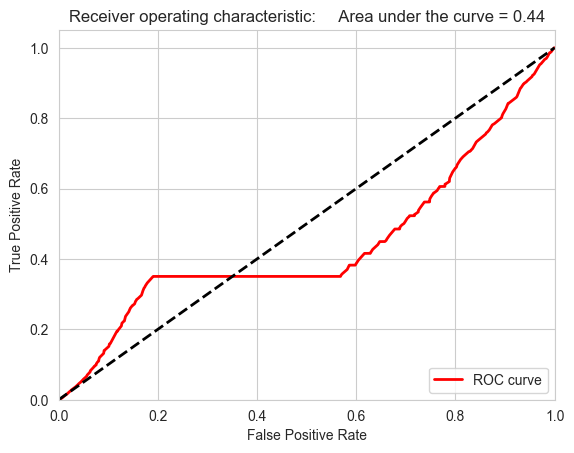

In [18]:
y = df['급가속']
anomalyScoresPCA = anomalyScores(X, X_train_PCA_inverse)
preds = plotResults(y, anomalyScoresPCA, True)

In [19]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.0
Recall:  0.0
Fraud Caught out of 330 Cases: 0


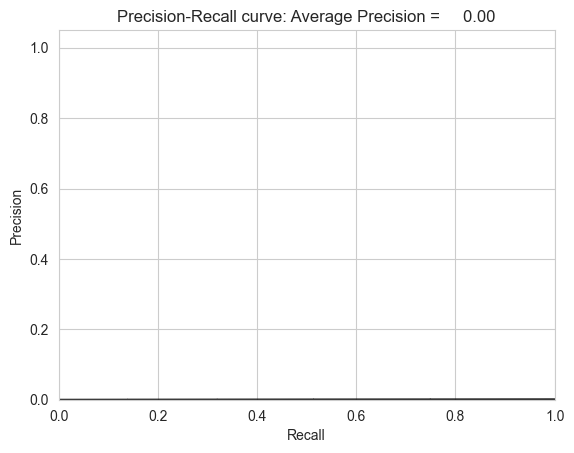

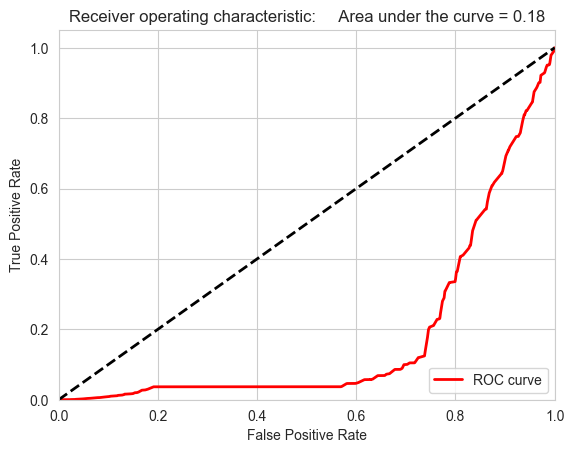

In [20]:
y = df['급감속']
anomalyScoresPCA = anomalyScores(X, X_train_PCA_inverse)
preds = plotResults(y, anomalyScoresPCA, True)

In [21]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.0
Recall:  0.0
Fraud Caught out of 330 Cases: 0


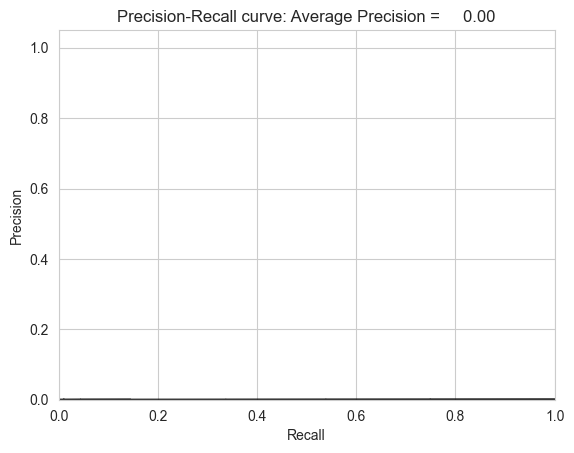

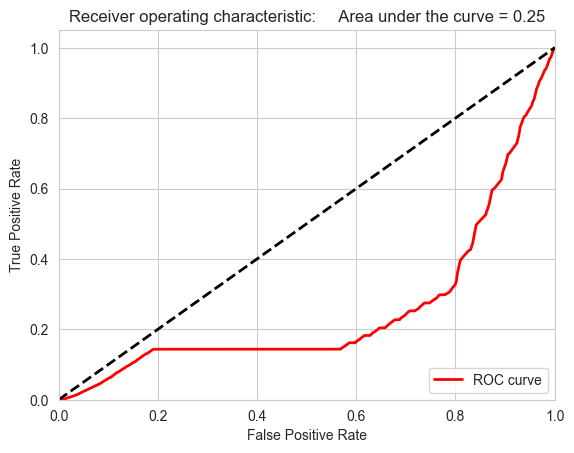

In [22]:
y = df['급출발']
anomalyScoresPCA = anomalyScores(X, X_train_PCA_inverse)
preds = plotResults(y, anomalyScoresPCA, True)

In [23]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.0
Recall:  0.0
Fraud Caught out of 330 Cases: 0


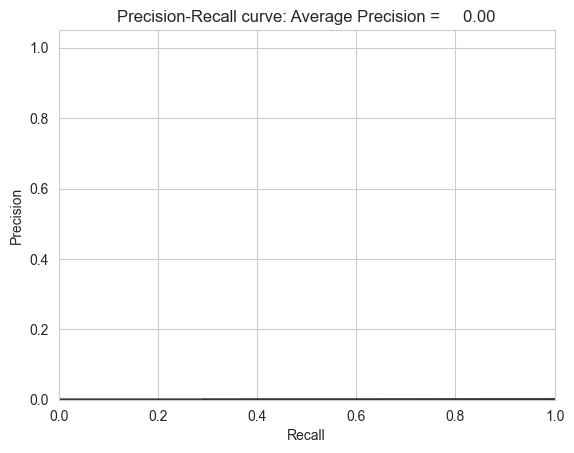

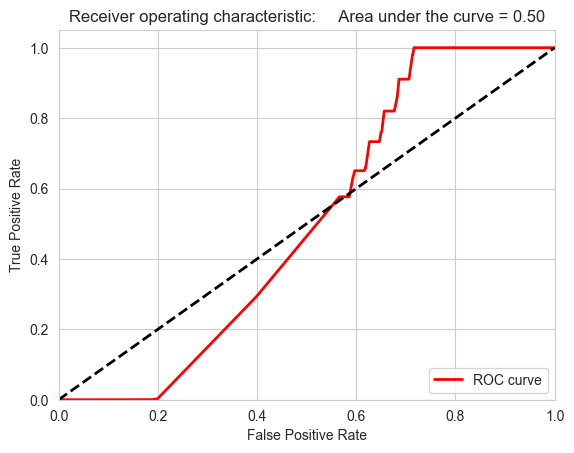

In [24]:
y = df['급정지']
anomalyScoresPCA = anomalyScores(X, X_train_PCA_inverse)
preds = plotResults(y, anomalyScoresPCA, True)

In [25]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.0
Recall:  0.0
Fraud Caught out of 330 Cases: 0


In [ ]:
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 42

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, early_exaggeration=early_exaggeration, init=init, random_state=random_state)
X_train_tSNE = tSNE.fit_transform(X_train_PCA)
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=X_train_PCA.index)

In [ ]:
y = df['급가속']
scatterPlot(X_train_tSNE, y, 't-SNE')